In [7]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import copy

In [8]:
graph_type = "barabasi_albert_graph"
num_nodes = 2000
influencers_cascade_steps = 4
num_influencers = 100
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 5

In [9]:
G = nx.barabasi_albert_graph(num_nodes, 2)
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1684
Number of deinfluenced nodes: 0
Number of susceptible nodes: 316
influencer {519, 1035, 534, 1048, 539, 544, 1060, 560, 1075, 1592, 1085, 62, 575, 582, 1612, 589, 86, 1623, 601, 1628, 1117, 1629, 607, 96, 609, 604, 1638, 1135, 631, 1145, 635, 1157, 1671, 1164, 654, 1173, 1177, 1691, 674, 688, 1204, 181, 1718, 696, 1725, 1217, 1223, 711, 715, 1742, 1755, 1247, 739, 228, 742, 745, 1773, 1264, 1265, 1784, 766, 1280, 258, 1796, 773, 1290, 1819, 1827, 1829, 1836, 1839, 1328, 1852, 842, 846, 337, 1363, 1893, 362, 1898, 1388, 1392, 881, 1914, 1923, 1413, 1928, 1931, 1424, 1938, 1429, 416, 1953, 422, 423, 430, 1456, 972, 974, 1007}


In [10]:
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)

/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code/experiment_framework.py:627: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


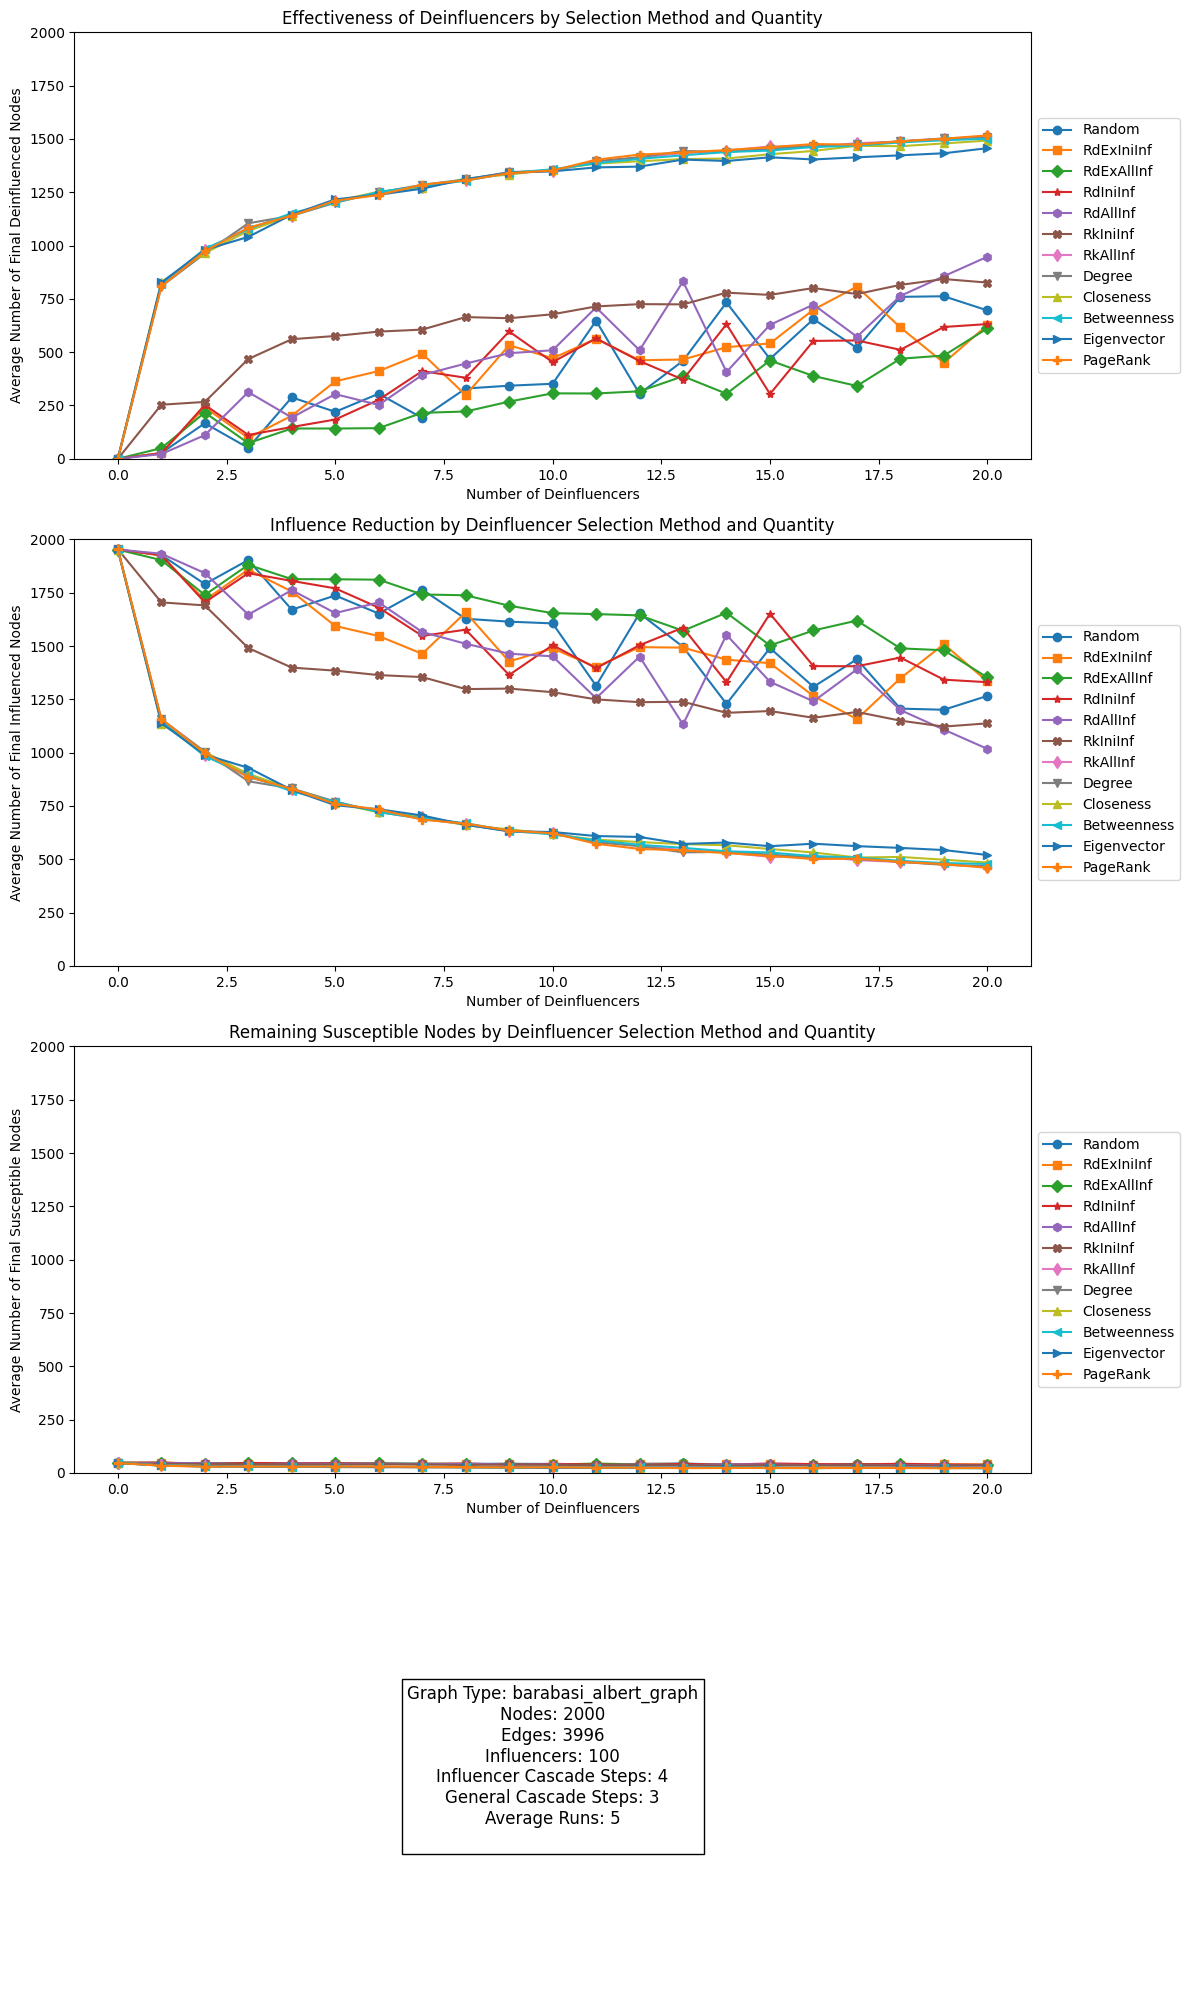

In [11]:
ef.plot_deinfluencer_results_exp3(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)